In [1]:
import sys
sys.path.append('/gpfs01/bethge/home/sschneider/thesis/code/domainadaptation/')

In [43]:
model = torch.load('log/20180911-164004_SelfEnsemblingSolver/checkpoint.pth')

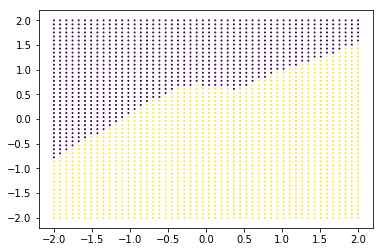

In [30]:
import numpy as np

model.eval()

with torch.no_grad():
    X = np.stack(np.meshgrid(np.linspace(-2,2),np.linspace(-2,2)), axis=-1).astype('float32')
    w,h = X.shape[:2]
    X = X.reshape(w*h,2).astype('float32')
    y = model(torch.from_numpy(X).cuda())[1].cpu().numpy()
    
lbls = y.argmax(axis=-1)
plt.scatter(*X.T, c = lbls, s = 1.)